In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
absor1 = pd.read_csv('/Users/huihaoz/Downloads/GeometricA_Earth_HighCloud_UltraRes1.dat', comment = '#', delimiter='\s+')
absor2 = pd.read_csv('/Users/huihaoz/Downloads/mktrans_zmnq_16_15.dat', comment = '#', delimiter='\s+')
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES2.txt', sep=',')
pts["Teq"] = (pts.STK * ((pts.SRadiusSun *  const.R_sun/(2*pts.SMAAU * const.au)))**(1/2) * (1-0.3)**(0.25))
pts.iloc[0,8]=181.7
pts.iloc[3,8]=351
pts.iloc[9,8]=468
pts.iloc[11,8]=301
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albH2O[:1079300])
chunked_list = list()
chunk_size = 251*2*5
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*2*5
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
alb_nogas = np.interp(absor1.nm/1000,wl_fit_non,np.array(pn_fit_non))
wl_um2 = np.array(absor1.nm[:1079300])/1000 * u.um
my_list_norabd = (absor1.totalb / alb_nogas)

# Iterate over the list and replace any value greater than 1 with 1
for i in range(len(my_list_norabd)):
    if my_list_norabd[i] > 1:
        my_list_norabd[i] = 1
tbd_planet=[]

for i in range(len(pts.Teq)):
    tbd_planet.append(np.array(my_list_norabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
dis_2 = pts.DistancePC* const.pc
d_s_2 = pts.RadiusEar * const.R_earth
ste = (d_s_2**2 * np.pi / dis_2**2)
tbd_planet_earth = []
for i in range(len(tbd_planet)):

    tbd_planet_earth.append((tbd_planet[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth =[]
for i in range(len(tbd_planet_earth)):
    Flux_tbd_planet_earth.append((tbd_planet_earth[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))


f_tra0 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra1 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra2 = pd.read_csv('/Users/huihaoz/Downloads/lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra3 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra4 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra5 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra6 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra7 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra8 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra9 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra10 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra11 = pd.read_csv('/Users/huihaoz/Downloads/lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra12 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra13 = pd.read_csv('/Users/huihaoz/Downloads/lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra14 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra15 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA)])
f_tra1_fum0=[10**(i-8) * u.erg/(u.s * u.cm**2 *u.Angstrom) for i in f_traErgsseccmA]
f_traAng=np.array([np.array(f_tra0.Angstroem / 10000),np.array(f_tra1.Angstroem / 10000),np.array(f_tra2.Angstroem / 10000),np.array(f_tra3.Angstroem / 10000),np.array(f_tra4.Angstroem / 10000),np.array(f_tra5.Angstroem / 10000),np.array(f_tra6.Angstroem / 10000),np.array(f_tra7.Angstroem / 10000),np.array(f_tra8.Angstroem / 10000),np.array(f_tra9.Angstroem / 10000),np.array(f_tra10.Angstroem / 10000),np.array(f_tra11.Angstroem / 10000),np.array(f_tra12.Angstroem / 10000),np.array(f_tra13.Angstroem / 10000),np.array(f_tra14.Angstroem / 10000),np.array(f_tra15.Angstroem / 10000)])


/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_1274/2248924930.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA),np.array(f_tra15.ErgsseccmA)])
/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_1274/2248924930.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is 

In [2]:
absor1.nm[255273]

900.001555

In [3]:
alb_nogas

array([0.5513832, 0.5513832, 0.5513832, ..., 2.585659 , 2.585659 ,
       2.585659 ])

In [4]:
# Split a Python List into Chunks using For Loops
our_list = np.array(o2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_o2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non))
baseline_feat = absor1.albo2[300000]*0.5*0.5
ind_o2 = np.where((interp_o2>0.15))

NameError: name 'o2_f' is not defined

In [5]:
h2o_f=(0.3-0.3*(absor1.albH2O[:1079300]/alb_nogas[:1079300]))
co2_f=(0.3-0.3*(absor1.albco2[:1079300]/alb_nogas[:1079300]))
ch4_f=(0.3-0.3*(absor1.albch4[:1079300]/alb_nogas[:1079300]))
o2_f=(0.3-0.3*(absor1.albo2[:1079300]/alb_nogas[:1079300]))



our_list = np.array(h2o_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_nonh2o = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_nonh2o = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]

our_list = np.array(co2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_nonco2 = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_nonco2 = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]

our_list = np.array(ch4_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_nonch4 = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_nonch4 = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]

our_list = np.array(o2_f)
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_nono2 = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_nono2 = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]

In [6]:
len(wl_fit_nono2)

430

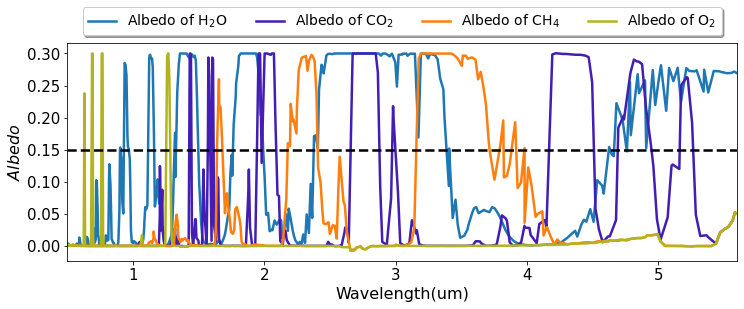

In [7]:
plt.figure(figsize=(12, 4))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_fit_nonh2o,pn_fit_nonh2o,linewidth=2.5,color = '#1f77b4',label=f'Albedo of H$_2$O' )
plt.plot(wl_fit_nonco2,pn_fit_nonco2,linewidth=2.5,color = '#421eb4',label=f'Albedo of CO$_2$' )
plt.plot(wl_fit_nonch4,pn_fit_nonch4,linewidth=2.5,color = '#ff7f0e',label=f'Albedo of CH$_4$' )
plt.plot(wl_fit_nono2,pn_fit_nono2,linewidth=2.5,color = '#B2B41F',label=f'Albedo of O$_2$' )
plt.hlines(y=0.15, xmin=0.5, xmax=5.6, colors='black', linestyles='--', lw=2.5)
#plt.plot(wl_um_rem,pn_planet_elt_rem[9][0],linewidth=3,color = 'red' )
#plt.errorbar(wl_um[:765], pn_15e_elt_nogas[:765],
#             yerr = dnr[15][:765],
#             fmt ='o')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Albedo$",fontdict={ 'size'   : 16})
plt.xlim(0.5,5.6)
#plt.ylim(0,0.5e3)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5,prop={'size': 14})

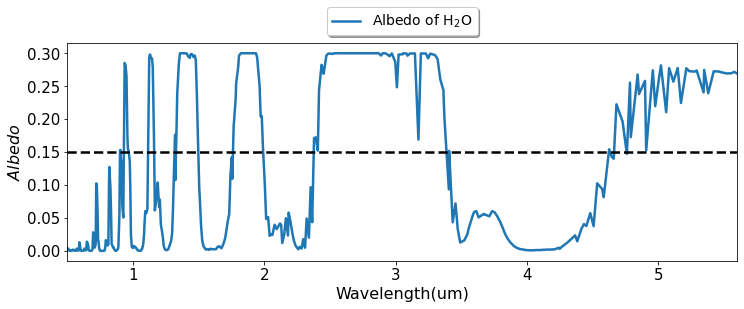

In [8]:
plt.figure(figsize=(12, 4))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_fit_nonh2o,pn_fit_nonh2o,linewidth=2.5,color = '#1f77b4',label=f'Albedo of H$_2$O' )
#plt.plot(wl_fit_nonco2,pn_fit_nonco2,linewidth=2.5,color = '#421eb4',label=f'Albedo of CO$_2$' )
#plt.plot(wl_fit_nonch4,pn_fit_nonch4,linewidth=2.5,color = '#ff7f0e',label=f'Albedo of CH$_4$' )
#plt.plot(wl_fit_nono2,pn_fit_nono2,linewidth=2.5,color = '#B2B41F',label=f'Albedo of O$_2$' )
plt.hlines(y=0.15, xmin=0.5, xmax=5.6, colors='black', linestyles='--', lw=2.5)
#plt.plot(wl_um_rem,pn_planet_elt_rem[9][0],linewidth=3,color = 'red' )
#plt.errorbar(wl_um[:765], pn_15e_elt_nogas[:765],
#             yerr = dnr[15][:765],
#             fmt ='o')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Albedo$",fontdict={ 'size'   : 16})
plt.xlim(0.5,5.6)
#plt.ylim(0,0.5e3)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5,prop={'size': 14})

In [9]:
np.where(np.array(pn_fit_nonh2o)>0.15)[0]

array([101, 102, 107, 108, 109, 110, 111, 112, 113, 114, 138, 139, 140,
       141, 142, 143, 144, 145, 167, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
       298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310,
       311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
       324, 325, 326, 327, 328, 329, 330, 332, 384, 387, 388, 390, 391,
       392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404,
       405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
       418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429])

In [10]:
ratio_h2o = np.sum(np.array(pn_fit_nonh2o)[np.where(np.array(pn_fit_nonh2o)>0.15)[0]]) / (np.sum (pn_fit_nonh2o))
ratio_ch4 = np.sum(np.array(pn_fit_nonch4)[np.where(np.array(pn_fit_nonch4)>0.15)[0]]) / (np.sum (pn_fit_nonch4))
ratio_co2 = np.sum(np.array(pn_fit_nonco2)[np.where(np.array(pn_fit_nonco2)>0.15)[0]]) / (np.sum (pn_fit_nonco2))
ratio_o2 = np.sum(np.array(pn_fit_nono2)[np.where(np.array(pn_fit_nono2)>0.15)[0]]) / (np.sum (pn_fit_nono2))
print("ratio h2o:",ratio_h2o)
print("ratio ch4:",ratio_ch4)
print("ratio co2:",ratio_co2)
print("ratio o2:",ratio_o2)

ratio h2o: 0.8636881402666334
ratio ch4: 0.7349604553073901
ratio co2: 0.7879204933347399
ratio o2: 0.6751752757895115


In [11]:
1-(ratio_h2o +ratio_ch4 +ratio_co2 +ratio_o2 )/4

0.2345639088254312

In [12]:
np.sum(np.array(pn_fit_nonh2o)[np.where(np.array(pn_fit_nonh2o)>0.15)[0]]) / (np.sum (pn_fit_nonh2o))

0.8636881402666334

In [ ]:
ind_h2o=np.where(np.array(pn_fit_nonh2o)>0.15)[0]

In [ ]:
(np.array(wl_fit_nonh2o)[ind_h2o])

array([0.90027514, 0.9028389 , 0.93192996, 0.93568416, 0.94308162,
       0.94432673, 0.9496931 , 0.95692144, 0.96077853, 0.96649651,
       1.11520409, 1.1227947 , 1.12541929, 1.12975002, 1.13608378,
       1.14435393, 1.14982399, 1.1589758 , 1.32012613, 1.33132911,
       1.33599069, 1.34850771, 1.35714558, 1.36468821, 1.36859655,
       1.38076397, 1.38388642, 1.39253285, 1.40073975, 1.40728952,
       1.41964729, 1.43120044, 1.43778339, 1.4456377 , 1.45060933,
       1.46033828, 1.46963834, 1.47785381, 1.48671416, 1.49141491,
       1.76597094, 1.78126509, 1.78481233, 1.80119014, 1.80625708,
       1.82055819, 1.83127922, 1.83995656, 1.85403775, 1.85978857,
       1.87708776, 1.8841331 , 1.89026016, 1.90301664, 1.9137561 ,
       1.92870404, 1.93657621, 1.94486112, 1.96335394, 1.97157635,
       1.97992437, 1.99018113, 2.37821263, 2.39150165, 2.4069756 ,
       2.41614886, 2.43544705, 2.44610837, 2.45134645, 2.47227455,
       2.4842523 , 2.4946562 , 2.51640597, 2.53635891, 2.55095

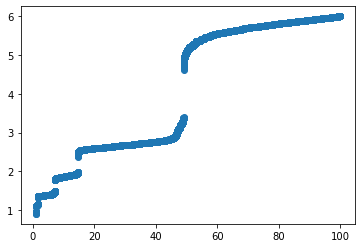

In [ ]:
plt.plot(np.linspace(1,100,len(np.array(absor1.nm[255273:1079300]/1000)[ind_h2o])),np.array(absor1.nm[255273:1079300]/1000)[ind_h2o],'o')

/usr/local/anaconda3/envs/surf_caltech/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


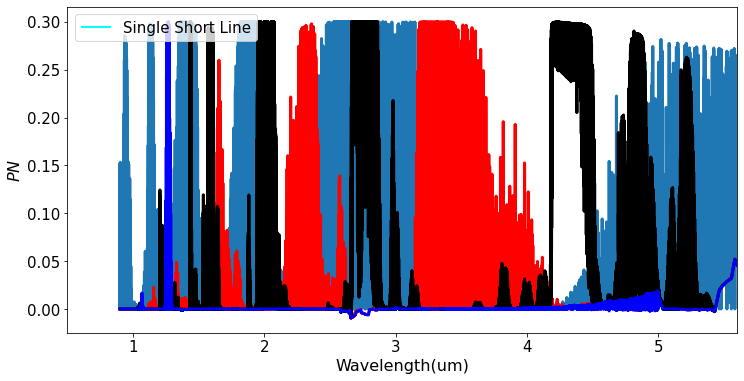

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(absor1.nm[255273:1079300]/1000,h2o_f[255273:],linewidth=3,color = '#1f77b4' )
plt.plot(absor1.nm[255273:1079300]/1000,ch4_f[255273:],linewidth=3,color = 'red' )
plt.plot(absor1.nm[255273:1079300]/1000,co2_f[255273:],linewidth=3,color = 'black' )
plt.plot(absor1.nm[255273:1079300]/1000,o2_f[255273:],linewidth=3,color = 'blue' )
plt.hlines(y=0.15, xmin=100, xmax=175, colors='aqua', linestyles='-', lw=2, label='Single Short Line')
#plt.plot(wl_um_rem,pn_planet_elt_rem[9][0],linewidth=3,color = 'red' )
#plt.errorbar(wl_um[:765], pn_15e_elt_nogas[:765],
#             yerr = dnr[15][:765],
#             fmt ='o')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
plt.xlim(0.5,5.6)
#plt.ylim(0,0.5e3)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [6]:
f_ref_earth_fit =[]
for i in range(len(f_tra1_fum0)):

    f_ref_earth_fit.append(np.interp(absor1.nm[:1079300]/1000,f_traAng[i],f_tra1_fum0[i]))

In [7]:
Flux_surface = []
for i in range(len(f_ref_earth_fit)):
    Flux_surface.append((f_ref_earth_fit[i][1:] * np.diff(absor1.nm[:1079300]/1000) * u.um).to(u.W/u.m**2))

In [8]:
df = (pts.SRadiusSun * const.R_sun / (pts.SMAAU * const.au))**2

f_ref_p = np.array(Flux_surface)* np.array(df).reshape(-1,1)
f_ref_earth = f_ref_p* np.pi * np.array(((pts.RadiusEar * const.R_earth)**2 / (4 * np.pi * (pts.DistancePC * const.pc)**2))).reshape(-1,1)
f_ref_earth_fit = f_ref_earth 

modern_earth_abd_fit = np.array(my_list_norabd[1:1079300])*0.3
f_ref_planet_earth_fit = [i * modern_earth_abd_fit for i in f_ref_earth_fit] #w/m2
flux_tot = np.array(f_ref_planet_earth_fit)+np.array(Flux_tbd_planet_earth)
wl_um_check = np.linspace(0.5,6,825) * u.um

Range_min=wl_um_check-np.diff(wl_um_check)[1]*0.5
Range_max=wl_um_check+np.diff(wl_um_check)[1]*0.5
bin_range=[]
for i in range(len(wl_um_check)):
    bin_range.append(np.where((absor1.nm[1:1079300]/1000 < Range_max[i]/u.um) & (absor1.nm[1:1079300]/1000 > Range_min[i]/u.um)))
flux_bin = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot)):
    for i in range(len(bin_range)):
        flux_bin[a].append(np.sum(flux_tot[a][bin_range[i]]))
        

# NO GAS
my_list_Noabd = alb_nogas*0+1
tbd_planet_no=[]

for i in range(len(pts.Teq)):
    tbd_planet_no.append(np.array(my_list_Noabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
tbd_planet_earth_no = []
for i in range(len(tbd_planet_no)):
    tbd_planet_earth_no.append((tbd_planet_no[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth_no =[]
for i in range(len(tbd_planet_earth_no)):
    Flux_tbd_planet_earth_no.append((tbd_planet_earth_no[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))
##
modern_earth_abd_fit_no = np.array(my_list_norabd[1:1079300])*0 + 0.3
f_ref_planet_earth_fit_no = [i * modern_earth_abd_fit_no for i in f_ref_earth_fit]
flux_tot_no = np.array(f_ref_planet_earth_fit_no)+np.array(Flux_tbd_planet_earth_no)

flux_bin_no = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot_no)):
    for i in range(len(bin_range)):
        flux_bin_no[a].append(np.sum(flux_tot_no[a][bin_range[i]]))

---

# Star

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.nddata import NDData

In [10]:
h = const.h
wl_um = np.linspace(0.5,6,825) * u.um
c = const.c #unit:m/s
wl_m = (wl_um).to(u.m)
pe_1 = h * c / (wl_um).to(u.um)
wl_um_check = np.linspace(0.5,6,825)*u.um

In [11]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [12]:
R = 150.0 # here we set Reseolution = 1000
t = 60*60.0 *u.s # here we set time = 1h with unit:s
S = (3930 * 0.5)**2 * np.pi *u.cm * u.cm #here we set diameter as the first diameter with unit:cm

In [13]:
pn_0_elt=(np.array(flux_bin_s[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1_elt=(np.array(flux_bin_s[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2_elt=(np.array(flux_bin_s[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3_elt=(np.array(flux_bin_s[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4_elt=(np.array(flux_bin_s[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5_elt=(np.array(flux_bin_s[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6_elt=(np.array(flux_bin_s[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7_elt=(np.array(flux_bin_s[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8_elt=(np.array(flux_bin_s[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9_elt=(np.array(flux_bin_s[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10_elt=(np.array(flux_bin_s[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11_elt=(np.array(flux_bin_s[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12_elt=(np.array(flux_bin_s[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13_elt=(np.array(flux_bin_s[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14_elt=(np.array(flux_bin_s[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_15_elt=(np.array(flux_bin_s[15])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

In [14]:
phe_1e=[i * u.W/u.m**2 for i in flux_bin] #new method, f_palnet

In [15]:
pn_0e_elt=(np.array(phe_1e[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1e_elt=(np.array(phe_1e[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2e_elt=(np.array(phe_1e[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3e_elt=(np.array(phe_1e[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4e_elt=(np.array(phe_1e[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5e_elt=(np.array(phe_1e[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6e_elt=(np.array(phe_1e[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7e_elt=(np.array(phe_1e[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8e_elt=(np.array(phe_1e[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10e_elt=(np.array(phe_1e[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11e_elt=(np.array(phe_1e[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12e_elt=(np.array(phe_1e[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13e_elt=(np.array(phe_1e[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14e_elt=(np.array(phe_1e[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_15e_elt=(np.array(phe_1e[15])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

# Noise

In [ ]:
pe_1 = h * c / (wl_um).to(u.um) #energy of photon
ste_atmo2 = ((2*u.um / (39.3*u.m))**2 * u.steradian).to(u.arcsec**2) #ste
n_s = pd.read_csv('/Users/huihaoz/Documents/reseatch/radiance.dat.txt', comment = '#', delimiter='\s+')
wl_ns = (np.array(n_s["wavelength(nm)"])*u.nm).to(u.um)
bri_surface = np.array(n_s["ph/sec/arcsec^2/um/m^2"])*u.ph/(u.m**2 * u.s * u.arcsec**2 *u.um)
pe_ns = (h * c /wl_ns).to(u.J)/u.ph
st = ste_atmo2
f_n_s = ((bri_surface *pe_ns).to(u.W/(u.m**2 * u.um * u.steradian))*st*np.diff(wl_ns)[1]).to(u.W/u.m**2)
bin_range_n = []

for i in range(len(wl_um)):
    bin_range_n.append(np.where((wl_ns/u.um < Range_max[i]/u.um) & (wl_ns/u.um > Range_min[i]/u.um)))
f_r_n=[]
for i in range(len(bin_range_n)):
    f_r_n.append(np.sum(f_n_s[bin_range_n[i]]).value)
pe_e = (h * c / wl_um).to(u.J)
noif_sky =(np.array(f_r_n)*u.W/u.m**2)
pnsky_1_elt=(noif_sky*S*t*wl_um/(pe_1*u.um)).to(u.m/u.m)

In [ ]:
trans = pd.read_csv('/Users/huihaoz/Documents/reseatch/transmission.dat.txt', comment = '#', delimiter='\s+')
trans_use = np.interp(wl_um/u.um,trans["wavelength(nm)"]/1000,trans["transmission"])

In [ ]:
pn_pla_elt=[pn_0e_elt,pn_1e_elt,pn_2e_elt,pn_3e_elt,pn_4e_elt,pn_5e_elt,pn_6e_elt,pn_7e_elt,pn_8e_elt,pn_9e_elt,pn_10e_elt,pn_11e_elt,pn_12e_elt,pn_13e_elt,pn_14e_elt,pn_15e_elt]
pn_star_elt=[pn_0_elt,pn_1_elt,pn_2_elt,pn_3_elt,pn_4_elt,pn_5_elt,pn_6_elt,pn_7_elt,pn_8_elt,pn_9_elt,pn_10_elt,pn_11_elt,pn_12_elt,pn_13_elt,pn_14_elt,pn_15_elt]
pnsky_1_elt

In [ ]:
nor_sky = np.random.normal(pnsky_1_elt,pnsky_1_elt**(1/2))

In [ ]:
modified_numbers = [0 if i < 0.01 else i for i in trans_use]

In [ ]:
# given list

# use list comprehension to find all indices of '0'
indices_rem = [i for i, x in enumerate(modified_numbers[:765]) if x == 0]

print(indices_rem)

In [ ]:
import numpy as np

# given numpy array
arr = np.array([1,2,0,2,4,0,0,0,2,3,4,5,0,5])

# indices to be removed
indices = np.array([2, 5, 6, 7, 12])

# remove elements
new_arr = np.delete(arr, indices)

print(new_arr)

In [ ]:
#modified_numbers=trans_use

In [ ]:
f_def = (np.array(pn_pla_elt)+np.array(pn_star_elt)*10**(-4))*modified_numbers + np.array(pnsky_1_elt)
nor_sky = np.random.normal(pnsky_1_elt,pnsky_1_elt**(1/2))
nor_trans = np.random.normal(trans_use,trans_use*0.01)
nor_star = np.random.normal(np.array(pn_star_elt)*10**(-4),(np.array(pn_star_elt)*10**(-4))**(1/2))
nor_total = np.random.normal((np.array(pn_star_elt)*10**(-4)*trans_use + np.array(pnsky_1_elt)),(np.array(pn_star_elt)*10**(-4)*trans_use + np.array(pnsky_1_elt))**(1/2))
newnor_trans = np.array([10**(100) if i==0 else i for i in nor_trans])

In [ ]:
f_rem = np.array(pn_pla_elt)*modified_numbers  + np.random.normal(0,(f_def+np.array(pn_star_elt)*10**(-4) * modified_numbers + np.array(pnsky_1_elt))**(1/2))
f_rem2 = f_rem/(modified_numbers)

In [ ]:
f_rem3 = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(f_rem )):
    f_rem3[i].append([0 if x in {float('inf'), float('-inf')} else x for x in f_rem2[i]])

In [ ]:
wl_um_rem = np.delete(wl_um[:765], indices_rem)

In [ ]:
from scipy.optimize import minimize


class GPR:

    def __init__(self, optimize=True):
        self.is_fit = False
        self.train_X, self.train_y = None, None
        self.params = {"l":(1/150), "sigma_f": 0.01}
        self.optimize = optimize

    def fit(self, X, y):
        # store train data
        self.train_X = np.asarray(X)
        self.train_y = np.asarray(y)
        self.is_fit = True

    def predict(self, X):
        if not self.is_fit:
            print("GPR Model not fit yet.")
            return

        X = np.asarray(X)
        Kff = self.kernel(self.train_X, self.train_X)  # (N, N)
        Kyy = self.kernel(X, X)  # (k, k)
        Kfy = self.kernel(self.train_X, X)  # (N, k)
        Kff_inv = np.linalg.inv(Kff + 1e-8 * np.eye(len(self.train_X)))  # (N, N)
        
        mu = Kfy.T.dot(Kff_inv).dot(self.train_y)
        cov = Kyy - Kfy.T.dot(Kff_inv).dot(Kfy)
        return mu, cov

    def kernel(self, x1, x2):
        dist_matrix = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
        return self.params["sigma_f"] ** 2 * np.exp(-0.5 / self.params["l"] ** 2 * dist_matrix)
def y(x, noise_sigma=0.0):
    x = np.asarray(x)
    y = np.cos(x) + np.random.normal(0, noise_sigma, size=x.shape)
    return y.tolist()

In [ ]:
x = wl_um.reshape(-1, 1)/u.um
train_X=x
gp_f_pla = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(f_rem3)):
    y = np.array(f_rem3[i]).reshape(-1, 1)
    train_y=y
    test_X = x
    gpr = GPR()
    gpr.fit(train_X, train_y)
    mu, cov = gpr.predict(test_X)
    test_y = mu.ravel()
    gp_f_pla[i].append(test_y)

In [ ]:
pn_planet_elt_rem = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(pn_planet_elt_rem)):
    p_list = [x if x >= 0 else 0 for x in gp_f_pla[i][0][:765]]
    pn_planet_elt_rem[i].append(np.delete(p_list, indices_rem))
    

In [ ]:
#f_rem3
#x = wl_um.reshape(-1, 1)/u.um
#train_X=x
## Define the function y = sin(x)
#y = new_lst
#train_y=y
#test_X = x

#gpr = GPR()
#gpr.fit(train_X, train_y)
#mu, cov = gpr.predict(test_X)
#test_y = mu.ravel()
#uncertainty = 1.96 * np.sqrt(np.diag(cov))
#plt.figure()
#plt.title("l=%.2f sigma_f=%.2f" % (gpr.params["l"], gpr.params["sigma_f"]))
#plt.fill_between(test_X.ravel(), test_y + uncertainty, test_y - uncertainty, alpha=0.1)
#plt.plot(test_X, test_y, label="predict")
#plt.scatter(train_X, train_y, label="train", c="red", marker="x")
#plt.xlim(0.8,0.9)
#plt.legend()

In [ ]:
c_1 = 10**(-4)
n_0 = (pn_0e_elt+c_1*pn_0_elt+pnsky_1_elt)**(1/2)
n_1 = (pn_1e_elt+c_1*pn_1_elt+pnsky_1_elt)**(1/2)
n_2 = (pn_2e_elt+c_1*pn_2_elt+pnsky_1_elt)**(1/2)
n_3 = (pn_3e_elt+c_1*pn_3_elt+pnsky_1_elt)**(1/2)
n_4 = (pn_4e_elt+c_1*pn_4_elt+pnsky_1_elt)**(1/2)
n_5 = (pn_5e_elt+c_1*pn_5_elt+pnsky_1_elt)**(1/2)
n_6 = (pn_6e_elt+c_1*pn_6_elt+pnsky_1_elt)**(1/2)
n_7 = (pn_7e_elt+c_1*pn_7_elt+pnsky_1_elt)**(1/2)
n_8 = (pn_8e_elt+c_1*pn_8_elt+pnsky_1_elt)**(1/2)
n_9 = (pn_9e_elt+c_1*pn_9_elt+pnsky_1_elt)**(1/2)
n_10 = (pn_10e_elt+c_1*pn_10_elt+pnsky_1_elt)**(1/2)
n_11 = (pn_11e_elt+c_1*pn_11_elt+pnsky_1_elt)**(1/2)
n_12 = (pn_12e_elt+c_1*pn_12_elt+pnsky_1_elt)**(1/2)
n_13 = (pn_13e_elt+c_1*pn_13_elt+pnsky_1_elt)**(1/2)
n_14 = (pn_14e_elt+c_1*pn_14_elt+pnsky_1_elt)**(1/2)
n_15 = (pn_15e_elt+c_1*pn_15_elt+pnsky_1_elt)**(1/2)

# No gas

In [ ]:
phe_1e_nogas=[i * u.W/u.m**2 for i in flux_bin_no] #changed

In [ ]:
pn_0e_elt_nogas=(np.array(phe_1e_nogas[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1e_elt_nogas=(np.array(phe_1e_nogas[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2e_elt_nogas=(np.array(phe_1e_nogas[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3e_elt_nogas=(np.array(phe_1e_nogas[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4e_elt_nogas=(np.array(phe_1e_nogas[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5e_elt_nogas=(np.array(phe_1e_nogas[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6e_elt_nogas=(np.array(phe_1e_nogas[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7e_elt_nogas=(np.array(phe_1e_nogas[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8e_elt_nogas=(np.array(phe_1e_nogas[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9e_elt_nogas=(np.array(phe_1e_nogas[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10e_elt_nogas=(np.array(phe_1e_nogas[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11e_elt_nogas=(np.array(phe_1e_nogas[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12e_elt_nogas=(np.array(phe_1e_nogas[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13e_elt_nogas=(np.array(phe_1e_nogas[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14e_elt_nogas=(np.array(phe_1e_nogas[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_15e_elt_nogas=(np.array(phe_1e_nogas[15])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

In [ ]:
dn = np.array([pn_0e_elt_nogas-pn_0e_elt,pn_1e_elt_nogas-pn_1e_elt,pn_2e_elt_nogas-pn_2e_elt,pn_3e_elt_nogas-pn_3e_elt,pn_4e_elt_nogas-pn_4e_elt,pn_5e_elt_nogas-pn_5e_elt,pn_6e_elt_nogas-pn_6e_elt,pn_7e_elt_nogas-pn_7e_elt,pn_8e_elt_nogas-pn_8e_elt,pn_9e_elt_nogas-pn_9e_elt,pn_10e_elt_nogas-pn_10e_elt,pn_11e_elt_nogas-pn_11e_elt,pn_12e_elt_nogas-pn_12e_elt,pn_13e_elt_nogas-pn_13e_elt,pn_14e_elt_nogas-pn_14e_elt,pn_15e_elt_nogas-pn_15e_elt])
dnr = np.array([n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,n_11,n_12,n_13,n_14,n_15])

# OK, all data debuged(above)
---

O2

In [ ]:
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albo2[:1079300])
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [min(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_o2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non)*0.5)
baseline_feat = absor1.albo2[300000]*0.5*0.5
ind_o2 = np.where((interp_o2[:765]<baseline_feat))

In [ ]:
ind_o2 

In [ ]:
snr_o2_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_o2_total[a].append(np.sum((dn[a][ind_o2[0]]/dnr[a][ind_o2[0]])**2)**(1/2))

In [ ]:
snr_o2_total

H2O

In [ ]:
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albH2O[:1079300])
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [min(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_h2o = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non)*0.5)
ind_h2o = np.where((interp_h2o[:765]<baseline_feat))

In [ ]:
ind_h2o

In [ ]:
snr_h2o_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_h2o_total[a].append(np.sum((dn[a][ind_h2o[0]]/dnr[a][ind_h2o[0]])**2)**(1/2))

In [ ]:
snr_h2o_total

CH4

In [ ]:
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albch4[:1079300])
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [min(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_ch4 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non)*0.5)
ind_ch4 = np.where((interp_ch4[:765]<baseline_feat))

In [ ]:
interp_ch4[:765]

In [ ]:
ind_ch4

In [ ]:
snr_ch4_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_ch4_total[a].append(np.sum((dn[a][ind_ch4[0]]/dnr[a][ind_ch4[0]])**2)**(1/2))

In [ ]:
snr_ch4_total

CO2

In [ ]:
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albco2[:1079300])
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [min(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_co2 = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non)*0.5)
ind_co2 = np.where((interp_co2[:765]<baseline_feat))

In [ ]:
snr_co2_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_co2_total[a].append(np.sum((dn[a][ind_co2[0]]/dnr[a][ind_co2[0]])**2)**(1/2))

In [ ]:
snr_co2_total

In [ ]:
pts

In [ ]:
Total_modern = (np.array(snr_ch4_total)**2+np.array(snr_co2_total)**2+np.array(snr_h2o_total)**2+np.array(snr_o2_total)**2)**(1/2)

In [ ]:
Total_modern

# Total_no_OVERLEAP(SNR from datafile)

In [ ]:
our_list = np.array(absor1.totalb[:1079300])
chunked_list = list()
chunk_size = 251*5*2
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*5*2
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [min(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index]
interp_tot_no = np.interp(wl_um/u.um,wl_fit_non,np.array(pn_fit_non)*0.5)
ind_tot_no = np.where((interp_tot_no[:765]<baseline_feat))

In [ ]:
snr_total=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for a in range(16):
    snr_total[a].append(np.sum((dn[a][ind_tot_no[0]]/dnr[a][ind_tot_no[0]])**2)**(1/2))

In [ ]:
snr_total

# Check

In [ ]:
def mag(f, f_0):
    m=-2.5 * (np.log(f/f_0)/np.log(10))
    return m

In [ ]:
mag_pt=[]
for i in range(len(flux_bin)):
    mag_pt.append(mag(flux_bin[i][3],2.16e-8/75))

In [ ]:
mag_pt

In [ ]:
mag(flux_bin_s[9][3], 2.16e-8/75)

In [ ]:
pts["SNR_o2"]=np.array(snr_o2_total)
pts["SNR_ch4"]=np.array(snr_ch4_total)
pts["SNR_h2o"]=np.array(snr_h2o_total)
pts["SNR_co2"]=np.array(snr_co2_total)
pts["SNR_total"]=np.array(snr_total)
#pts["NO_OVER"]=np.array(snr_total)
pts["mag"]=mag_pt




In [ ]:
pts

# GJ 887 b

run 1 first

In [ ]:
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

In [ ]:
len(gp_f_pla[9][0])

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um[:765],pn_9e_elt_nogas[:765],linewidth=3,color = '#1f77b4' )
plt.plot(wl_um_rem,pn_planet_elt_rem[9][0],linewidth=3,color = 'red' )
#plt.errorbar(wl_um[:765], pn_15e_elt_nogas[:765],
#             yerr = dnr[15][:765],
#             fmt ='o')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.ylim(0,0.5e3)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um[:765],pn_9e_elt_nogas[:765],linewidth=3,color = '#1f77b4' )
plt.plot(wl_um[:765],pn_9e_elt[:765],linewidth=3,color = 'red' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
#plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(wl_um, dn[9] /n_9 )
plt.plot(wl_um[ch4_tot_ind], dn[9][ch4_tot_ind] /n_9[ch4_tot_ind],'o',color = 'red', label ='Data come from SIMBAD',ms=3)
plt.xlim(0.9,5)
plt.ylim(0,50)


In [ ]:
np.sum((dn[9][ch4_tot_ind] /n_9[ch4_tot_ind])**2)**(0.5)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(wl_um, pn_14e_elt /n_14 )
plt.plot(wl_um[result], pn_14e_elt[result] /n_14[result],'o',color = 'red', label ='Data come from SIMBAD',ms=3)

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um[:765],pn_9_elt[:765],linewidth=3,color = 'red' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
flux_bin_the = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(Flux_tbd_planet_earth)):
    for i in range(len(bin_range)):
        flux_bin_the[a].append(np.sum(Flux_tbd_planet_earth[a][bin_range[i]].value))
        
        

In [ ]:
flux_bin_ref = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_ref_planet_earth_fit)):
    for i in range(len(bin_range)):
        flux_bin_ref[a].append(np.sum(f_ref_planet_earth_fit[a][bin_range[i]]))

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_ref[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_the[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,(np.array(flux_bin_the[9])+np.array(flux_bin_ref[9])),linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

## STAR

In [ ]:
pts

In [ ]:
pts[["Planet","SNR_o2","SNR_ch4","SNR_h2o","SNR_co2","SNR_total"]]

In [ ]:
len(f_s[1])

In [ ]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,flux_bin_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
#AT EARTH
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(absor1.nm[1:1079300]/1000,f_s[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$W/m2$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:
#SURFACE
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(f_traAng[9],f_tra1_fum0[9],linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$erg/ s\ cm^2\ A$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [ ]:

plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um,n_9,linewidth=3,color = '#1f77b4' )
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$PN$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.ylim(0,0.00006)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

# check contrast form 10-3 to 10-6

In [ ]:
n_9_3=(pn_9e_elt+10**(-3) *pn_9_elt+pnsky_1_elt)**(1/2)
n_9_6=(pn_9e_elt+10**(-6) *pn_9_elt+pnsky_1_elt)**(1/2)
n_9_5=(pn_9e_elt+10**(-5) *pn_9_elt+pnsky_1_elt)**(1/2)

In [ ]:
print("SNR(h2o) with instrument contrast 10-3:",np.sum((dn[9][ind_h2o]/n_9_3[ind_h2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-5:",np.sum((dn[9][ind_h2o]/n_9_5[ind_h2o])**2)**(1/2))
print("SNR(h2o) with instrument contrast 10-6:",np.sum((dn[9][ind_h2o]/n_9_6[ind_h2o])**2)**(1/2))

In [ ]:
print("SNR(ch4) with instrument contrast 10-3:",np.sum((dn[9][ind_ch4]/n_9_3[ind_ch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-5:",np.sum((dn[9][ind_ch4]/n_9_5[ind_ch4])**2)**(1/2))
print("SNR(ch4) with instrument contrast 10-6:",np.sum((dn[9][ind_ch4]/n_9_6[ind_ch4])**2)**(1/2))

In [ ]:
print("SNR(o2) with instrument contrast 10-3:",np.sum((dn[9][ind_o2]/n_9_3[ind_o2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-5:",np.sum((dn[9][ind_o2]/n_9_5[ind_o2])**2)**(1/2))
print("SNR(o2) with instrument contrast 10-6:",np.sum((dn[9][ind_o2]/n_9_6[ind_o2])**2)**(1/2))

In [ ]:
print("SNR(co2) with instrument contrast 10-3:",np.sum((dn[9][ind_co2]/n_9_3[ind_co2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-5:",np.sum((dn[9][ind_co2]/n_9_5[ind_co2])**2)**(1/2))
print("SNR(co2) with instrument contrast 10-6:",np.sum((dn[9][ind_co2]/n_9_6[ind_co2])**2)**(1/2))

In [ ]:
print("SNR(total) with instrument contrast 10-3:",np.sum((dn[9][ind_tot_no]/n_9_3[ind_tot_no])**2)**(1/2))
print("SNR(total) with instrument contrast 10-5:",np.sum((dn[9][ind_tot_no]/n_9_5[ind_tot_no])**2)**(1/2))
print("SNR(total) with instrument contrast 10-6:",np.sum((dn[9][ind_tot_no]/n_9_6[ind_tot_no])**2)**(1/2))

# TRAPPIST-1

In [ ]:
pts

In [ ]:
pts.DistancePC[14]*u.pc

In [ ]:
pts.RadiusEar[14]*u.R_earth

In [ ]:
pts.SMAAU[14]*u.au

In [ ]:
((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)

## Sep

### arctan(a / D)

In [ ]:
np.arctan((pts.SMAAU[14]*u.au/(pts.DistancePC[14]*u.pc)).to(u.m/u.m)).to(u.arcsec)

## Contrast

In [ ]:
((((pts.RadiusEar[14]*u.R_earth / (pts.SMAAU[14]*u.au))**2).to(u.m/u.m)))*0.3

# H

In [ ]:
np.arctan((pts.SMAAU[15]*u.au/(pts.DistancePC[15]*u.pc)).to(u.m/u.m)).to(u.arcsec)

In [ ]:
((((pts.RadiusEar[15]*u.R_earth / (pts.SMAAU[15]*u.au))**2).to(u.m/u.m)))*0.3